# Python Time Series Crash Course_Part 8: Deep Learning with Time Series

## Full Day Workshop for user learn Data Science with Python
### 2018  Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Section A: MultiLayer Preceptrons
Time Series prediction is a dicult problem both to frame and to address with machine learning.
In this lesson you will discover how to develop neural network models for time series prediction
in Python using the Keras deep learning library.

## Multilayer Perceptron Regression
We will phrase the time series prediction problem as a regression problem. That is, given the
number of passengers (in units of thousands) this month, what is the number of passengers next
month.

In [13]:
# The code was removed by DSX for sharing.

#### extract the NumPy array from the dataframe and convert the integer values to 
#### floating point values which are more suitable for modeling with a neural network

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


- For a normal classification or regression problem we would do this using k-fold cross-validation. 
- With time series data,
the sequence of values is important.

In [14]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


- below using NumPy array that we want to convert into a dataset and
the look back which is the number of previous time steps to use as input variables to predict
the next time period, 
- in this case, defaulted to 1. This default will create a dataset where X is
the number of passengers at a given time (t) 
- and Y is the number of passengers at the next
time (t+1).

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

- Fit a Multilayer Perceptron model to the training data. 
- We use a simple network
with 1 input, 1 hidden layer with 8 neurons and an output layer.

In [18]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 47573.9633
Epoch 2/200
0s - loss: 41639.8015
Epoch 3/200
0s - loss: 35673.9452
Epoch 4/200
0s - loss: 29458.4012
Epoch 5/200
0s - loss: 23369.9154
Epoch 6/200
0s - loss: 17670.1444
Epoch 7/200
0s - loss: 12727.3561
Epoch 8/200
0s - loss: 8638.0334
Epoch 9/200
0s - loss: 5552.2135
Epoch 10/200
0s - loss: 3408.7565
Epoch 11/200
0s - loss: 2051.5052
Epoch 12/200
0s - loss: 1280.4075
Epoch 13/200
0s - loss: 862.2527
Epoch 14/200
0s - loss: 672.6911
Epoch 15/200
0s - loss: 584.1934
Epoch 16/200
0s - loss: 554.7299
Epoch 17/200
0s - loss: 546.6082
Epoch 18/200
0s - loss: 547.3612
Epoch 19/200
0s - loss: 538.8212
Epoch 20/200
0s - loss: 538.5309
Epoch 21/200
0s - loss: 536.9807
Epoch 22/200
0s - loss: 536.0283
Epoch 23/200
0s - loss: 537.1250
Epoch 24/200
0s - loss: 535.7831
Epoch 25/200
0s - loss: 538.2118
Epoch 26/200
0s - loss: 538.4746
Epoch 27/200
0s - loss: 538.2311
Epoch 28/200
0s - loss: 537.3817
Epoch 29/200
0s - loss: 538.2828
Epoch 30/200
0s - loss: 539.0565


#### estimate the performance of the model on the train and test datasets.

In [19]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.06 MSE (48.53 RMSE)


#### generate predictions using the model for both the train and test dataset to get a visual indication of the skill of the model.

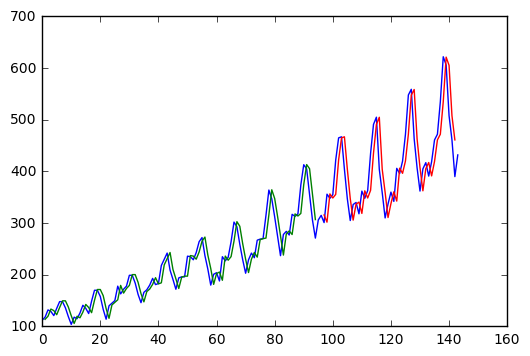

In [20]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### From the plot Blue=Whole Dataset, Green=Training, Red=Predictions.
- the model did a pretty poor job of fitting both the training and the test
datasets. 
- It basically predicted the same input value as the output. 
- The plot makes the
prediction look good, but in fact, the shift in the prediction results in a poor skill score.

## Multilayer Perceptron Using the Window Method
- We can also phrase the problem so that multiple recent time steps can be used to make the
prediction for the next time step. 
- This is called the window method,

In [22]:
# The create dataset() function 
# we wrote in the previous section allows us to create this formulation of the time series problem by increasing the look back argument 
# from 1 to 3.

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [23]:
# Following same step in previous section
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Epoch 1/400
0s - loss: 100115.8298
Epoch 2/400
0s - loss: 45472.2547
Epoch 3/400
0s - loss: 28891.7654
Epoch 4/400
0s - loss: 19620.8998
Epoch 5/400
0s - loss: 10779.0570
Epoch 6/400
0s - loss: 4689.8100
Epoch 7/400
0s - loss: 1935.1872
Epoch 8/400
0s - loss: 1227.7157
Epoch 9/400
0s - loss: 1156.3608
Epoch 10/400
0s - loss: 1144.1517
Epoch 11/400
0s - loss: 1136.3954
Epoch 12/400
0s - loss: 1144.8801
Epoch 13/400
0s - loss: 1130.2068
Epoch 14/400
0s - loss: 1141.0862
Epoch 15/400
0s - loss: 1152.7436
Epoch 16/400
0s - loss: 1131.0443
Epoch 17/400
0s - loss: 1129.6998
Epoch 18/400
0s - loss: 1121.5348
Epoch 19/400
0s - loss: 1131.4068
Epoch 20/400
0s - loss: 1124.6385
Epoch 21/400
0s - loss: 1131.1824
Epoch 22/400
0s - loss: 1115.2257
Epoch 23/400
0s - loss: 1119.0461
Epoch 24/400
0s - loss: 1112.9920
Epoch 25/400
0s - loss: 1118.5174
Epoch 26/400
0s - loss: 1101.7867
Epoch 27/400
0s - loss: 1113.0259
Epoch 28/400
0s - loss: 1097.5137
Epoch 29/400
0s - loss: 1115.8805
Epoch 30/400
0s -

### the error was reduced compared to that of the previous section.

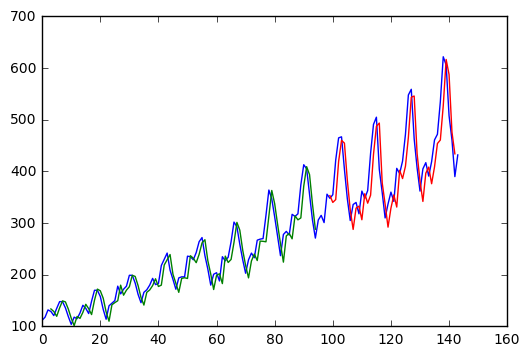

In [24]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### the window size and the network architecture were not tuned, this is just a demonstration of how to frame a prediction problem.

# Section B: Time Series Prediction with LSTM
-  A powerful type of neural network designed to handle sequence
dependence are called recurrent neural networks. 
 $$Long-Short-Term-Memory$$ 


- Networks or
LSTM network  a type of recurrent neural network used in deep learning because very large
architectures can be successfully trained

In [25]:
# Reuse the same dataset

- LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default)
or tanh activation functions are used. 
- It can be a good practice to rescale the data to the range
of 0-to-1,
- also called **Normalizing**

In [28]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [29]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

- Following network has a
visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons and 
- an output layer
that makes a single value prediction. 
- The default sigmoid activation function is used for the
LSTM memory blocks. 
- The network is trained for 100 epochs and a batch size of 1 is used.

In [55]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [56]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/200
2s - loss: 0.0329
Epoch 2/200
0s - loss: 0.0152
Epoch 3/200
0s - loss: 0.0116
Epoch 4/200
0s - loss: 0.0104
Epoch 5/200
0s - loss: 0.0096
Epoch 6/200
0s - loss: 0.0087
Epoch 7/200
0s - loss: 0.0078
Epoch 8/200
0s - loss: 0.0070
Epoch 9/200
0s - loss: 0.0061
Epoch 10/200
0s - loss: 0.0053
Epoch 11/200
0s - loss: 0.0045
Epoch 12/200
0s - loss: 0.0038
Epoch 13/200
0s - loss: 0.0033
Epoch 14/200
0s - loss: 0.0028
Epoch 15/200
0s - loss: 0.0024
Epoch 16/200
0s - loss: 0.0023
Epoch 17/200
0s - loss: 0.0023
Epoch 18/200
0s - loss: 0.0021
Epoch 19/200
0s - loss: 0.0020
Epoch 20/200
0s - loss: 0.0020
Epoch 21/200
0s - loss: 0.0020
Epoch 22/200
0s - loss: 0.0020
Epoch 23/200
0s - loss: 0.0020
Epoch 24/200
0s - loss: 0.0021
Epoch 25/200
0s - loss: 0.0021
Epoch 26/200
0s - loss: 0.0020
Epoch 27/200
0s - loss: 0.0020
Epoch 28/200
0s - loss: 0.0020
Epoch 29/200
0s - loss: 0.0020
Epoch 30/200
0s - loss: 0.0020
Epoch 31/200
0s - loss: 0.0020
Epoch 32/200
0s - loss: 0.0021
Epoch 33/200
0s -

- the model has an average error of about 23 passengers (in thousands) on
- the training dataset and about 52 passengers (in thousands) on the test dataset. Not that bad.

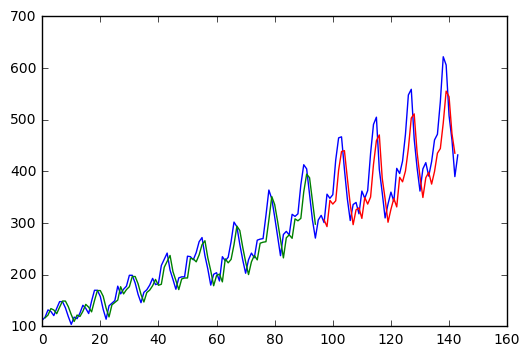

In [33]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM For Regression Using the Window Method

In [34]:
# Same procedure, but lookback change to 3
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [35]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
1s - loss: 0.0493
Epoch 2/100
0s - loss: 0.0209
Epoch 3/100
0s - loss: 0.0147
Epoch 4/100
0s - loss: 0.0127
Epoch 5/100
0s - loss: 0.0114
Epoch 6/100
0s - loss: 0.0102
Epoch 7/100
0s - loss: 0.0089
Epoch 8/100
0s - loss: 0.0079
Epoch 9/100
0s - loss: 0.0069
Epoch 10/100
0s - loss: 0.0060
Epoch 11/100
0s - loss: 0.0053
Epoch 12/100
0s - loss: 0.0048
Epoch 13/100
0s - loss: 0.0042
Epoch 14/100
0s - loss: 0.0040
Epoch 15/100
0s - loss: 0.0037
Epoch 16/100
0s - loss: 0.0036
Epoch 17/100
0s - loss: 0.0034
Epoch 18/100
0s - loss: 0.0033
Epoch 19/100
0s - loss: 0.0033
Epoch 20/100
0s - loss: 0.0033
Epoch 21/100
0s - loss: 0.0033
Epoch 22/100
0s - loss: 0.0033
Epoch 23/100
0s - loss: 0.0032
Epoch 24/100
0s - loss: 0.0031
Epoch 25/100
0s - loss: 0.0031
Epoch 26/100
0s - loss: 0.0031
Epoch 27/100
0s - loss: 0.0031
Epoch 28/100
0s - loss: 0.0031
Epoch 29/100
0s - loss: 0.0031
Epoch 30/100
0s - loss: 0.0031
Epoch 31/100
0s - loss: 0.0031
Epoch 32/100
0s - loss: 0.0030
Epoch 33/100
0s -

#### that the error was increased slightly compared to that of the previous section.
#### The window size and the network architecture were not tuned, 
#### this is just a demonstration of how to frame a prediction problem.

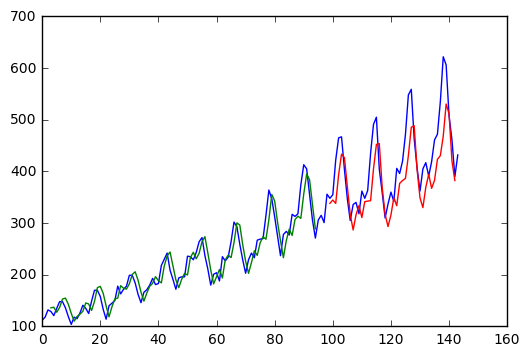

In [36]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM For Regression with Time Steps

- Some sequence problems may have a varied number of time steps per sample. 
- For example, you
may have measurements of a physical machine leading up to a point of failure or a point of
surge. 
- Each incident would be a sample, the observations that lead up to the event would be
the time steps and the variables observed would be the features. 
- Time steps provides another
way to phrase our time series problem.

In [38]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

#### Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature, 
#### which is indeed a more accurate framing of the problem.

In [39]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
1s - loss: 0.0434
Epoch 2/100
0s - loss: 0.0193
Epoch 3/100
0s - loss: 0.0169
Epoch 4/100
0s - loss: 0.0153
Epoch 5/100
0s - loss: 0.0136
Epoch 6/100
0s - loss: 0.0125
Epoch 7/100
0s - loss: 0.0110
Epoch 8/100
0s - loss: 0.0094
Epoch 9/100
0s - loss: 0.0082
Epoch 10/100
0s - loss: 0.0070
Epoch 11/100
0s - loss: 0.0062
Epoch 12/100
0s - loss: 0.0054
Epoch 13/100
0s - loss: 0.0050
Epoch 14/100
0s - loss: 0.0046
Epoch 15/100
0s - loss: 0.0043
Epoch 16/100
0s - loss: 0.0042
Epoch 17/100
0s - loss: 0.0042
Epoch 18/100
0s - loss: 0.0039
Epoch 19/100
0s - loss: 0.0041
Epoch 20/100
0s - loss: 0.0039
Epoch 21/100
0s - loss: 0.0043
Epoch 22/100
0s - loss: 0.0041
Epoch 23/100
0s - loss: 0.0039
Epoch 24/100
0s - loss: 0.0040
Epoch 25/100
0s - loss: 0.0039
Epoch 26/100
0s - loss: 0.0040
Epoch 27/100
0s - loss: 0.0039
Epoch 28/100
0s - loss: 0.0038
Epoch 29/100
0s - loss: 0.0038
Epoch 30/100
0s - loss: 0.0039
Epoch 31/100
0s - loss: 0.0037
Epoch 32/100
0s - loss: 0.0040
Epoch 33/100
0s -

#### that the results are slightly better than previous example, and the structure of the input data makes a lot more sense

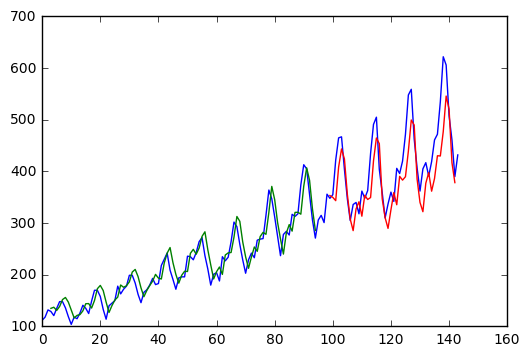

In [40]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM With Memory Between Batches
## The LSTM network has memory which is capable of remembering across long sequences.

- Normally, the state within the network is reset after each training batch when fitting the model,
as well as each call to model.predict() or model.evaluate(). 
- We can gain finer control over
when the internal state of the LSTM network is cleared in Keras by making the LSTM layer
stateful.
- This means that it can build state over the entire training sequence and even maintain
that state if needed to make predictions.

In [ ]:
#for i in range(100):
#model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
#model.reset_states()

- above requires that the training data not be shued when tting the network. 
- It also requires
explicit resetting of the network state after each exposure to the training data (epoch) by calls
to model.reset states(). 
- This means that we must create our own outer loop of epochs and
within each epoch call model.fit() and model.reset states(), for example:

In [41]:
#model.add(LSTM(4, batch_input_shape=(batch_size, time_steps, features), stateful=True))

- Finally, when the LSTM layer is constructed, the stateful parameter must be set to True
and 
- instead of specifying the input dimensions, we must hard code the number of samples in batch, 
- number of time steps in a sample and number of features in a time step by setting the
batch input shape parameter.

In [ ]:
#model.predict(trainX, batch_size=batch_size)

- Same batch size must then be used later when evaluating the model and making
predictions. 

In [42]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [44]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/1
1s - loss: 0.0052
Epoch 1/1
0s - loss: 0.0077
Epoch 1/1
0s - loss: 0.0062
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0053
Epoch 1/1
0s - loss: 0.0052
Epoch 1/1
0s - loss: 0.0051
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss:

- that results are better than some, worse than others. The model may need more
modules and
- may need to be trained for more epochs to internalize the structure of the problem.

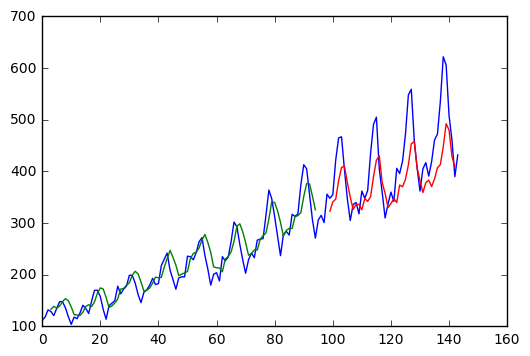

In [45]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTMs With Memory Between Batches
- Finally, we will take a look at one of the big benets of LSTMs, the fact that 
- they can be
successfully trained when stacked into deep network architectures. 
- LSTM networks can be
stacked in Keras in the same way that other layer types can be stacked

In [46]:
#model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
    #return_sequences=True))
#model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))

- One addition to the
configuration that is required is that
- an LSTM layer prior to each subsequent LSTM layer must
return the sequence. 
- This can be done by setting the return sequences parameter on the layer
to True. 
- We can extend the stateful LSTM in the previous section to have two layers,

In [63]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [64]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(500):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/1
5s - loss: 0.0045
Epoch 1/1
1s - loss: 0.0203
Epoch 1/1
1s - loss: 0.0208
Epoch 1/1
1s - loss: 0.0182
Epoch 1/1
1s - loss: 0.0130
Epoch 1/1
1s - loss: 0.0097
Epoch 1/1
1s - loss: 0.0094
Epoch 1/1
1s - loss: 0.0108
Epoch 1/1
1s - loss: 0.0099
Epoch 1/1
1s - loss: 0.0096
Epoch 1/1
1s - loss: 0.0089
Epoch 1/1
1s - loss: 0.0085
Epoch 1/1
1s - loss: 0.0081
Epoch 1/1
1s - loss: 0.0079
Epoch 1/1
1s - loss: 0.0078
Epoch 1/1
1s - loss: 0.0077
Epoch 1/1
1s - loss: 0.0077
Epoch 1/1
1s - loss: 0.0077
Epoch 1/1
1s - loss: 0.0077
Epoch 1/1
1s - loss: 0.0078
Epoch 1/1
1s - loss: 0.0078
Epoch 1/1
1s - loss: 0.0077
Epoch 1/1
1s - loss: 0.0077
Epoch 1/1
1s - loss: 0.0077
Epoch 1/1
1s - loss: 0.0077
Epoch 1/1
1s - loss: 0.0076
Epoch 1/1
1s - loss: 0.0076
Epoch 1/1
1s - loss: 0.0076
Epoch 1/1
1s - loss: 0.0075
Epoch 1/1
1s - loss: 0.0075
Epoch 1/1
1s - loss: 0.0075
Epoch 1/1
1s - loss: 0.0074
Epoch 1/1
1s - loss: 0.0074
Epoch 1/1
1s - loss: 0.0074
Epoch 1/1
1s - loss: 0.0074
Epoch 1/1
1s - loss:

#### predictions on the test dataset are again worse. This is more evidence to suggest the need for additional training epochs.

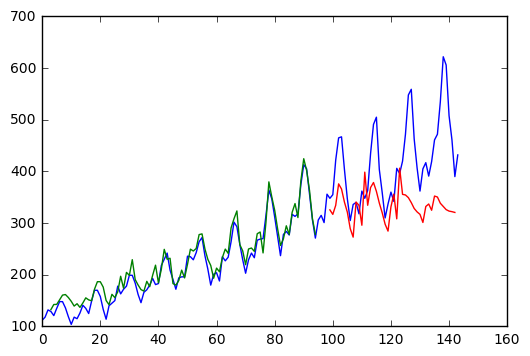

In [65]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()